In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = np.loadtxt('hour.csv',
           dtype='int,str,int,int,int,int,int,int,int,int,float,float,float,float,int,int,int',
           delimiter=',',
           skiprows=1,
            unpack=1)

In [111]:
dataByDay = list(map((lambda x: x == 1), data[8]))
indices = []
count = 0

for day in dataByDay:
    if day == False:
        indices.append(count)
    count += 1
    
indices = np.array(indices)

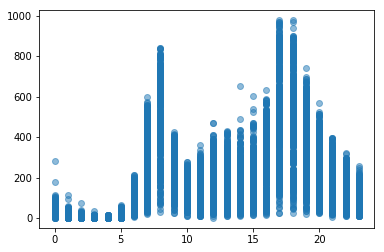

In [112]:
x = np.delete(data[5],indices)
y = np.delete(data[16],indices)
plt.scatter(x,y,alpha=0.5)
plt.show()

In [7]:
dataTran = np.delete(data,1,0).astype(float)
dataTran = np.delete(dataTran,0,0).astype(float)
corrMat = np.corrcoef(dataTran)

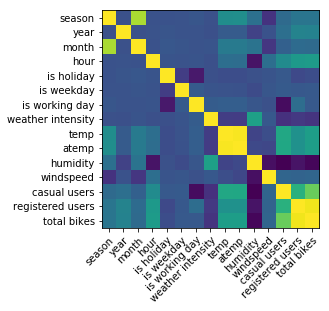

In [9]:
feats = ["season","year","month","hour","is holiday","is weekday","is working day", "weather intensity","temp","atemp","humidity","windspeed","casual users","registered users","total bikes"]

fig, ax = plt.subplots()
im = ax.imshow(corrMat)

ax.set_xticks(np.arange(len(feats)))
ax.set_yticks(np.arange(len(feats)))
ax.set_xticklabels(feats)
ax.set_yticklabels(feats)

plt.setp(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode="anchor")

#fig.tight_layout()
plt.show()

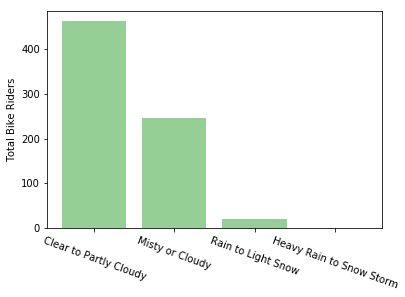

In [51]:
weatherSits = ("Clear to Partly Cloudy", "Misty or Cloudy", "Rain to Light Snow", "Heavy Rain to Snow Storm")
ypos = np.arange(len(weatherSits))

weathTypeAmt = [ 0, 0, 0, 0 ]
for i in range(len(dataTran[13])):
    weathTypeAmt[int(dataTran[6][i] - 1)] += 1

plt.bar(ypos,weathTypeAmt,align='center',alpha=0.5)
plt.xticks(ypos, weatherSits,rotation=-20)
plt.ylabel('Total Bike Riders')
plt.show()

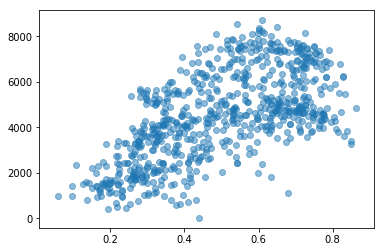

In [66]:
x = dataTran[7]
y = dataTran[13]
plt.scatter(x,y,alpha=0.5)
plt.show()